In [266]:
import numpy as np
import matplotlib.pyplot as plt
# This part calls for the tex package with Palantino font family 
# Note latex should be installed in the system to run this
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})
from math import *

# Problem 1

In [323]:
def sinc(x):
    if x!=0:
        return np.sin(x)/x
    else:
        return 1

xlim = 5000
n = 10001
Delta = 2*xlim/(n-1)
x = np.linspace(-xlim, xlim, n)
fx = np.vectorize(sinc)(x)
k = (2*np.pi/(n*Delta))*np.arange(-(n-1)/2,(n-1)/2+1)

In [324]:
dft = np.fft.fft(fx, norm="ortho")
dft = np.fft.fftshift(dft)

In [325]:
factor = (Delta)*np.sqrt(n/(2*np.pi))*np.exp(-1j*k*np.min(x))
ft_dft = factor*dft

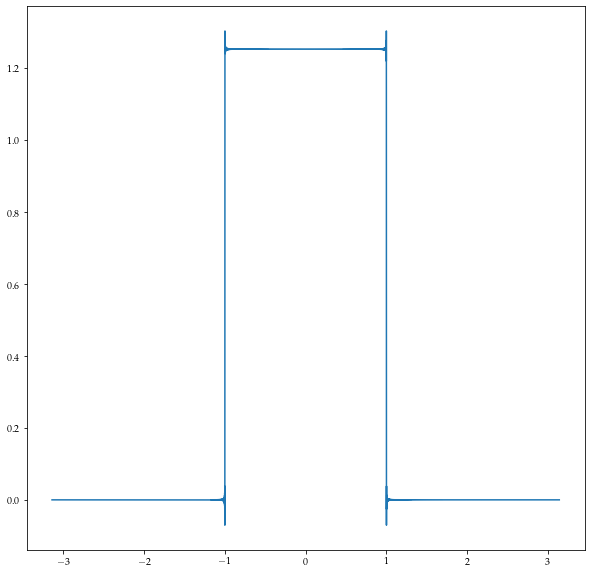

In [326]:
fig1 = plt.figure(figsize=(10,10))
plt.plot(k,np.real(ft_dft))

In [327]:
def ft_true(k):
    if np.abs(k)<1:
        return np.sqrt(np.pi/2)
    elif np.abs(k)==1:
        return (3/4)*np.sqrt(np.pi/2)
    else:
        return 0

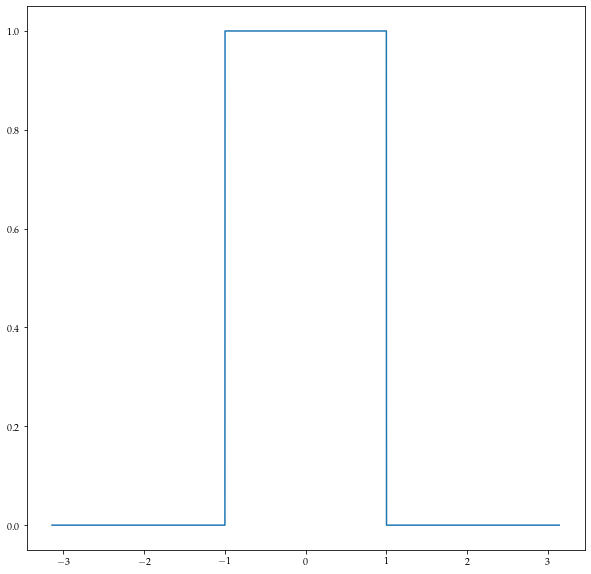

In [328]:
true_func = np.vectorize(ft_true)(k)
fig1 = plt.figure(figsize=(10,10))
plt.plot(k,true_func)

# Problem 10

In [267]:
meshlim = 500
meshsize = 5001
x = np.linspace(-meshlim, meshlim, meshsize)
y = np.linspace(-meshlim, meshlim, meshsize)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.exp(-(xx**2 + yy**2))
xx.shape, yy.shape, zz.shape

((5001, 5001), (5001, 5001), (5001, 5001))

In [268]:
Delta = 2*meshlim/(meshsize-1)
kx = (2*np.pi/(meshsize*Delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)
ky = (2*np.pi/(meshsize*Delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)
kxx, kyy = np.meshgrid(kx, ky)
kzz = 0.5*np.exp(-(kxx**2+kyy**2)/4)

In [269]:
omegazz = np.fft.fft2(zz,norm="ortho")
omegazz = np.fft.fftshift(omegazz)

In [270]:
factor = (Delta**2)*(meshsize/(2*np.pi))*np.exp(-1j*(kxx*np.min(x)+kyy*np.min(y)))
ft_omegazz = factor*omegazz

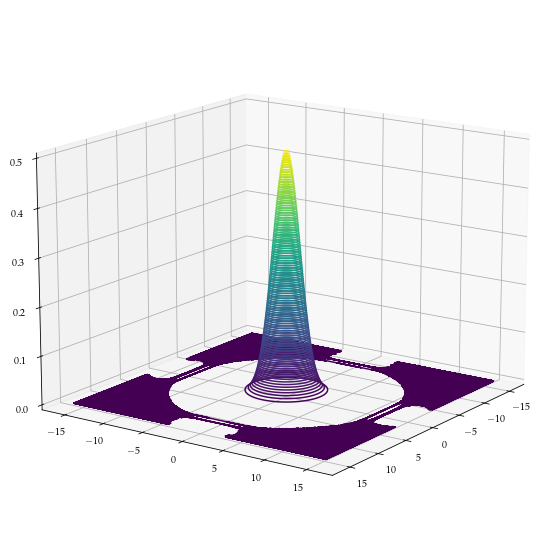

In [271]:
fig1 = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection='3d')
ax1.contour3D(kxx, kyy, ft_omegazz,100)
ax1.view_init(15, 35)
plt.show()

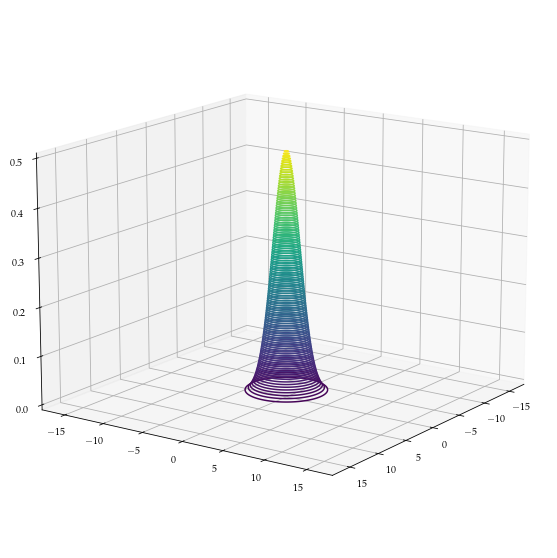

In [272]:
fig2 = plt.figure(figsize=(10,10))
ax2 = plt.axes(projection='3d')
ax2.contour3D(kx, ky, kzz, 100)
ax2.view_init(15, 35)
plt.show()

In [273]:
np.allclose(ft_omegazz,kzz)

True